# Wstęp (Introduction)

Projekt zakłada stworzenie programu DNA wspomagającego statystyczne oszacowanie podobieństwa DNA. Poniższe funkcje są przydatne zwłaszcza w skomplikowanych powiązaniach krzyżowych w drzewie genealogicznym.

The project assumes the creation of a DNA program supporting statistical estimation of DNA similarity. The following functions are useful especially in complex cross-connections in the family tree.

## Import

In [ ]:
import pandas as pd
import random
import string
import matplotlib.pyplot as plt
import seaborn as sns

## Dokładność (Precision)

Poniższa wartość oznacza ilość losowych liczb przypadających na jedną osobę i definiuje dokładność symulacji.

The following value indicates the number of random numbers per person and defines the accuracy of the simulation.

In [ ]:
eps = 100000

# Funkcje (Functions)

## Nowa osoba (New Person)

Niniejsza funkcja służy do dodawania nowej osoby w symulacji. Każdej osobie przypisywana jest tablica 100 elementów mająca imitować złożoność DNA z dokładnością eps.

This function is used to add a new person in the simulation. Each person is assigned an array of 100 elements intended to imitate the complexity of DNA with eps accuracy.

In [ ]:
def stworz_i_wypelnij_tablice(n):
  if not isinstance(n, int) or n <= 0:
    raise ValueError("Liczba elementów (n) musi być dodatnią liczbą całkowitą.")

  tablica = []
  for _ in range(n):
    tablica.append(random.randint(1, 100))
  return tablica

## Dziecko (Child)

Niniejsza funkcja służy do losowego dziedziczenia pojedynczych wirtualnych genów puli dwóch osób. Powstała w ten sposób tablica stanowi wirtualny kod DNA dziecka podanych osób.

This function is used to randomly inherit single virtual genes from a pool of two people. The resulting board is a virtual DNA code for the child of the specified people.

In [ ]:
def lacz_tablice_losowo(tablica1, tablica2):
  if not isinstance(tablica1, list) or not isinstance(tablica2, list):
    raise TypeError("Argumenty muszą być listami.")

  if len(tablica1) != len(tablica2):
    print("Błąd: Tablice muszą mieć tę samą długość.")
    return None

  tablica3 = []
  for i in range(len(tablica1)):
    # Losowo wybierz 0 lub 1
    wybor = random.randint(0, 1)
    if wybor == 0:
      tablica3.append(tablica1[i])
    else:
      tablica3.append(tablica2[i])
  return tablica3

## Podobieństwo DNA (DNA similarity)

Niniejsza funkcja służy do statystycznego porównania podobieństwa DNA pomiędzy dwoma osobami zwracając je w postaci procentowej.

This function is used to statistically compare the similarity of DNA between two people by returning them as a percentage.

In [ ]:
def procent_identycznosci(tablica1, tablica2):
  if not isinstance(tablica1, list) or not isinstance(tablica2, list):
    raise TypeError("Argumenty muszą być listami.")
  if len(tablica1) != len(tablica2):
    print("Ostrzeżenie: Tablice mają różną długość. Procent identyczności będzie obliczony na podstawie najkrótszej tablicy, lub zwrócone 0% jeśli to istotne.")
    return 0.0
  if not tablica1:
      return 0.0

  identyczne_elementy = 0
  dlugosc_do_porownania = len(tablica1)

  for i in range(dlugosc_do_porownania):
    if tablica1[i] == tablica2[i]:
      identyczne_elementy += 1

  procent = (identyczne_elementy / dlugosc_do_porownania) * 100
  return procent

# Przykład (Example)

## Tworzenie (creating)

Niniejsza  grafika przedstawia złożone drzewo genealogiczne użyte w poniższym przykładzie użycia.

This graphic shows the complex family tree used in the usage example below.

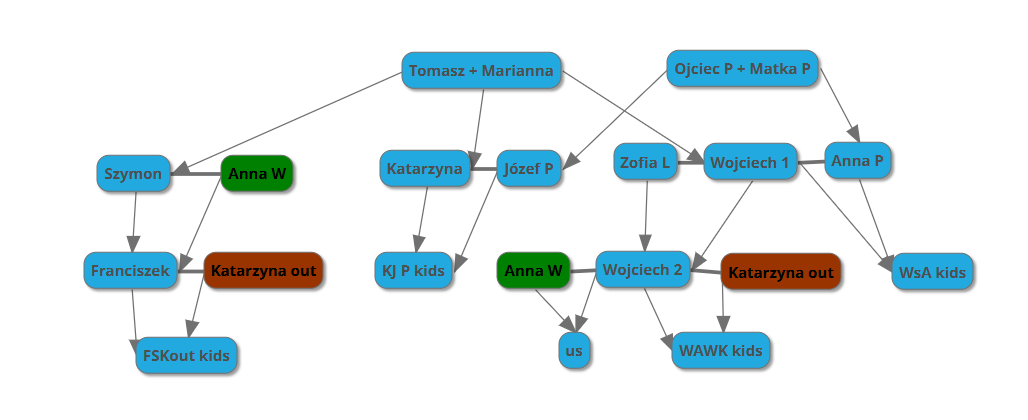

Listy konieczne do poprawnego zapisywania danych:

Lists necessary to correctly save data:

In [ ]:
lista_list = []
litery = []

### Nowa osoba (New Person)

Tworzenie nowej osoby:

Creating a new person:

In [ ]:
lista_list.append(stworz_i_wypelnij_tablice(eps))
litery.append('Katarzyna out')

### Dziecko (Child)

Tworzenie dziecka dwóch osób:

Creating a child of two people:

In [ ]:
lista_list.append(lacz_tablice_losowo(lista_list[5],lista_list[8]))
litery.append('KJ P kids')

## Macierz podobieństwa (Similarity matrix)

Zawartość tablicy imion:

Name table contents:

In [ ]:
litery

['Tomasz',
 'Marianna',
 'Anna W',
 'Ojciec P',
 'Matka P',
 'Katarzyna',
 'Wojciech 1',
 'Szymon',
 'Józef P',
 'Anna P',
 'Zofia L',
 'Franciszek',
 'Katarzyna out',
 'FSKout kids',
 'WsA kids',
 'Wojciech 2',
 'us',
 'WAWK kids',
 'KJ P kids']

Porównanie wszystkich osób ze sobą nawzajem:

Comparing all individuals to each other:

In [ ]:
# Inicjalizacja pustej macierzy do przechowywania wyników
data = []

# Wypełnianie macierzy wynikami procent_identycznosci
for i in range(len(lista_list)):
    row = []
    for j in range(len(lista_list)):
        # Porównujemy listę i-tą z listą j-tą
        wynik = procent_identycznosci(lista_list[i], lista_list[j])
        row.append(round(wynik, 2)) # Zaokrąglamy do 2 miejsc po przecinku
    data.append(row)

# Tworzenie DataFrame
df = pd.DataFrame(data, index=litery, columns=litery)

## Wyniki (Result)

Macierz podobieństwa:

Similarity matrix:

In [ ]:
df

,Tomasz,Marianna,Anna W,Ojciec P,Matka P,Katarzyna,Wojciech 1,Szymon,Józef P,Anna P,Zofia L,Franciszek,Katarzyna out,FSKout kids,WsA kids,Wojciech 2,us,WAWK kids,KJ P kids
Tomasz,100.00,0.99,1.03,0.99,1.03,50.34,50.48,50.36,1.02,0.99,1.00,25.53,0.95,13.34,25.58,25.48,13.19,13.21,25.74
Marianna,0.99,100.00,1.02,1.03,0.99,50.65,50.51,50.64,1.03,1.01,1.05,25.89,1.01,13.51,25.91,25.61,13.40,13.32,25.73
Anna W,1.03,1.02,100.00,1.01,1.05,0.99,0.97,1.02,1.02,1.01,0.99,50.62,0.99,25.62,1.03,1.00,50.67,0.98,0.95
Ojciec P,0.99,1.03,1.01,100.00,1.01,0.99,1.03,1.05,50.21,50.39,1.03,1.03,0.99,0.98,25.68,1.02,1.01,1.04,25.62
Matka P,1.03,0.99,1.05,1.01,100.00,1.00,1.01,1.02,50.80,50.62,0.99,1.02,0.94,0.95,25.88,1.00,1.05,0.97,25.97
Katarzyna,50.34,50.65,0.99,0.99,1.00,100.00,50.59,50.50,1.03,0.99,0.97,25.68,0.99,13.46,25.79,25.57,13.30,13.27,50.42
Wojciech 1,50.48,50.51,0.97,1.03,1.01,50.59,100.00,50.46,1.03,1.01,1.03,25.77,0.96,13.37,50.47,50.10,25.56,25.50,25.62
Szymon,50.36,50.64,1.02,1.05,1.02,50.50,50.46,100.00,1.04,1.01,1.02,50.40,0.97,25.81,25.67,25.41,13.25,13.24,25.85
Józef P,1.02,1.03,1.02,50.21,50.80,1.03,1.03,1.04,100.00,50.55,1.06,1.00,0.98,0.97,25.65,1.05,1.04,1.03,50.60
Anna P,0.99,1.01,1.01,50.39,50.62,0.99,1.01,1.01,50.55,100.00,1.03,1.02,0.95,0.95,50.54,1.00,1.00,1.00,25.74


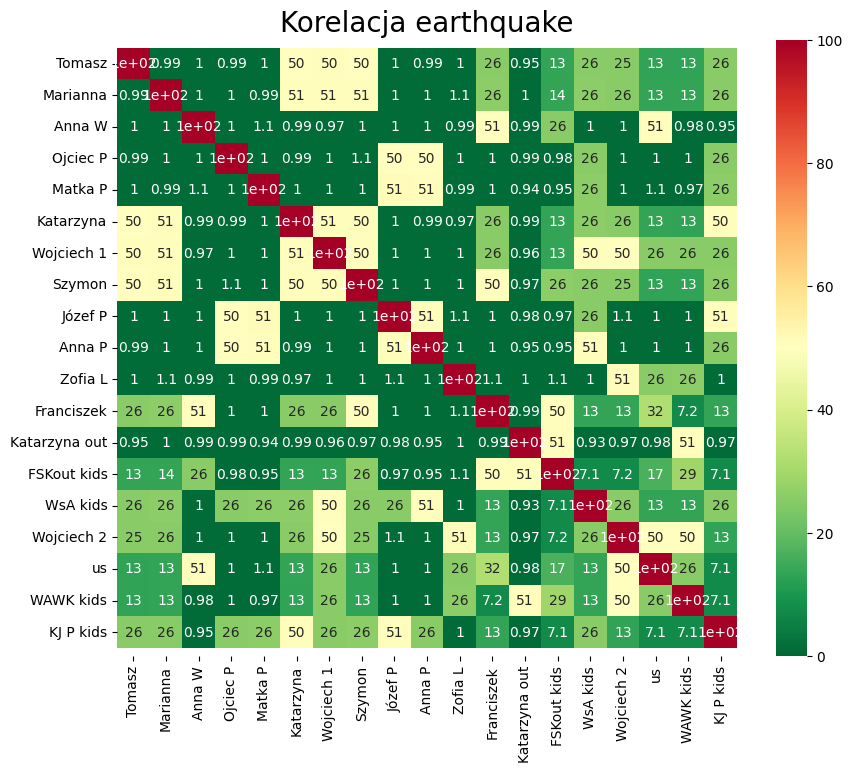

In [ ]:
plt.figure(figsize=(10, 8))

ax = sns.heatmap(df,
                 xticklabels=litery,
                 yticklabels=litery,
                 cmap='RdYlGn_r',
                 vmin=0, vmax=100,
                 annot=True, center=50)

plt.title('Korelacja earthquake', fontsize=20)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.25, top - 0.25)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()